# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

print(crops.head())

print(crops.shape)

print(crops.info())

print("Valores nulos por columna:\n", crops.isna().sum())

print(crops.nunique())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
(2200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None
Valores nulos por columna:
 N       0
P       0
K       0
ph      0
crop    0
dtype: int64
N        137
P        117
K         73
ph      2200
crop      22
dtype: int64


In [2]:
#Definiendo las variables de caracteristicas (X) y la variable objetivo (y)
X = crops.drop("crop", axis=1) #Todas las columnas excepto la columna 'crop' son caracteristica
y = crops["crop"] # La columna 'crop' es la variable objetivo

#Se divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                    random_state=42)

In [3]:
for feature in ["N", "P", "K", "ph"]:
    # Creando el modelo de regresión logística
    log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    # Ajustando el modelo a la característica en X_train
    log_reg.fit(X_train[[feature]], y_train)
    # Predicendo los valores objetivo utilizando el conjunto de prueba
    y_pred = log_reg.predict(X_test[[feature]])
    # Calculando el F1-score para la característica
    feature_performance = f1_score(y_test, y_pred, average="weighted")
    #Imprimiendo resultado
    print(f"F1-score for {feature}: {feature_performance}")

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


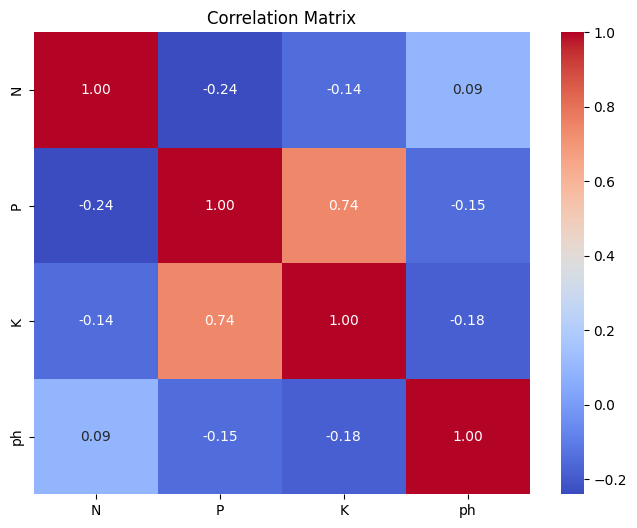

In [4]:
#Calculando la matriz de correlación
correlation_matrix = X_train.corr()

#Se utiliza un mapa de calor para visualizar la matriz de correlacion
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [5]:
#Basados en el mapa de calor de la matriz de correlacion junto con los resultados del rendimiento de caracteristicas anteriores, se elije las siguientes caracteristicas para nuestro modelo final
final_features = ["N", "K", "ph"]

#Se imprime las caracteristicas elegidas
print("Final Features: ", final_features)

Final Features:  ['N', 'K', 'ph']


In [6]:
X = X[final_features]

#Se divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                    random_state=42)

# Creando y entrenando el modelo de regresión logística final
log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
log_reg.fit(X_train, y_train)

# Prediciendo los valores objetivo utilizando el conjunto de prueba
y_pred_final = log_reg.predict(X_test)

# Calculando el F1-score para evaluar el rendimiento del modelo final
model_performance = f1_score(y_test, y_pred_final, average="weighted")

# Imprimiendo el rendimiento del modelo final
print("F1-score for the final model:", model_performance)


F1-score for the final model: 0.558010495235685
